In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42

import seaborn as sns

sns.set_theme(style="dark")
import sys



from scripts.paper_figures.data_processing.data_processing import main as init_data
from scripts.paper_figures.data_processing.process_pumping import ProboscisProcessing

In [ ]:
# Initialize Data
llh, process_data, io_process,expt_info_df = init_data()

In [ ]:
import matplotlib.pyplot as plt


# To plot columns 7, 8, and 10
def plot_columns(data_slice):
    for col in [7, 8, 10]:
        plt.plot(data_slice.index, data_slice[col] - data_slice[col].iloc[0], label=f"Column {col}")

    plt.xlabel('Time Index')
    plt.ylabel('Value (adjusted)')
    plt.legend()
    plt.show()


def plot_data(key,sliced_data_dict):
    from scipy.signal import savgol_filter
    
    slice_data = sliced_data_dict[key]
    
    # Apply the Savitzky-Golay filter to each column
    window_size = 31  # you can adjust this based on your data
    poly_order = 3  # usually set to 3
    
    for col in slice_data.columns:
        slice_data[col] = savgol_filter(slice_data[col], window_size, poly_order)
    for col in [7, 8, 10]:
        plt.plot(slice_data.index, slice_data[col] - slice_data[col].iloc[0], label=f"Column {col}")
    
    # Set xticks at intervals of 30 seconds for a 30 Hz sampling rate
    xtick_interval = 30 * 60
    xticks = list(range(slice_data.index.min(), slice_data.index.max() + xtick_interval, xtick_interval))
    
    # Generate xtick labels in the format minutes:seconds
    xtick_labels = [
        f"{int((i - slice_data.index.min()) / (30 * 60))}:{int((i - slice_data.index.min()) % (30 * 60) / 30):02}" for i in
        xticks]
    
    plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)
    
    # Adding legend and labels
    plt.legend()
    plt.xlabel("Time (minutes:seconds)")
    plt.ylabel("Adjusted Value")
    plt.title(f"Adjusted Column Values for Key: {key}")
    plt.tight_layout()

In [ ]:
from input import Input
#Get Snap Features Associated with the desired experiment with start - stop time
expt_name= 'Fly01242022_F_A_8am'
start = 18601
stop = 19963

snap_data, col_names = Input.load_snap_fts(io_process,expt_name)

In [ ]:
import pandas as pd

data = """
59207	59252
81678	81722
82639	82685
84662	84707
295682	295727
296653	296697
297116	297162
36128	36186
68496	68541
301376	301420
315368	315413
717387	717433
739613	739658
1246183	1246228
1256270	1256314
1260934	1260979
1294150	1294194
1307347	1307391
1339910	1339954
1343370	1343414
1345876	1345920
1351495	1351540
1467919	1467965
"""

# Split data into lines and then split each line into start and stop values
start_vals = []
stop_vals = []

for line in data.strip().split("\n"):
    start, stop = line.split("\t")
    start_vals.append(int(start))
    stop_vals.append(int(stop))

# Create the dataframe
df = pd.DataFrame({
    'start_cols': start_vals,
    'stop_cols': stop_vals
})

# Sample rate and duration
SAMPLE_RATE = 30  # 30 Hz
DURATION = 5 * 60 * SAMPLE_RATE  # 5 minutes

# Dictionary to store slices
sliced_data_dict = {}

for index, row in df.iterrows():
    start_idx = row['start_cols'] - DURATION
    stop_idx = row['stop_cols'] + DURATION
    
    # Slice snap_data
    current_slice = snap_data.loc[start_idx:stop_idx]
    
    # Use the (start, stop) as a key for the dictionary
    key = (row['start_cols'], row['stop_cols'])
    sliced_data_dict[key] = current_slice

import matplotlib.pyplot as plt

# To plot columns 7, 8, and 10
def plot_columns(data_slice):
    for col in [7,8,10]:
        plt.plot(data_slice.index, data_slice[col] - data_slice[col].iloc[0], label=f"Column {col}")

    plt.xlabel('Time Index')
    plt.ylabel('Value (adjusted)')
    plt.legend()
    plt.show()



In [ ]:
# Plotting data for each (start, stop) interval
for key, slice_data in sliced_data_dict.items():
    print(f"Plotting for interval: {key}")
    plot_columns(slice_data)

In [ ]:
key = (59207,59252)
from scipy.signal import savgol_filter
slice_data = sliced_data_dict[key]

# Apply the Savitzky-Golay filter to each column
window_size = 31  # you can adjust this based on your data
poly_order = 3  # usually set to 3

for col in slice_data.columns:
    slice_data[col] = savgol_filter(slice_data[col], window_size, poly_order)
for col in [7,8,10]:
    plt.plot(slice_data.index, slice_data[col] - slice_data[col].iloc[0], label=f"Column {col}")
    
# Set xticks at intervals of 30 seconds for a 30 Hz sampling rate
xtick_interval = 30 * 60
xticks = list(range(slice_data.index.min(), slice_data.index.max() + xtick_interval, xtick_interval))

# Generate xtick labels in the format minutes:seconds
xtick_labels = [f"{int((i - slice_data.index.min()) / (30*60))}:{int((i - slice_data.index.min()) % (30*60) / 30):02}" for i in xticks]

plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Adding legend and labels
plt.legend()
plt.xlabel("Time (minutes:seconds)")
plt.ylabel("Adjusted Value")
plt.title(f"Adjusted Column Values for Key: {key}")
plt.tight_layout()

PLOT OTHERS 

In [ ]:
from input import Input
#Get Snap Features Associated with the desired experiment with start - stop time
expt_name= 'Fly01192022_F_B_8am'
start = 18601
stop = 19963

snap_data, col_names = Input.load_snap_fts(io_process,expt_name)

In [ ]:
import pandas as pd

data = """
88519	88563
195928	195973
246777	246823
303400	303446
305925	305970
306844	306888
318545	318589
356805	356849
390734	390780
447157	447202
756649	756694
769576	769621
1024446	1024491
1028660	1028705
1048161	1048206
1062447	1062492
1063559	1063604
1619278	1619323
1619844	1619888
1620059	1620105
1621170	1621254
1634334	1634380
1643487	1643532
1646505	1646550
1661963	1662008
1663353	1663397
1664933	1664978
1688469	1688513
1724521	1724565
1725032	1725078
1725608	1725652
1725994	1726040
1726377	1726423
"""

# Split data into lines and then split each line into start and stop values
start_vals = []
stop_vals = []

for line in data.strip().split("\n"):
    start, stop = line.split("\t")
    start_vals.append(int(start))
    stop_vals.append(int(stop))

# Create the dataframe
df = pd.DataFrame({
    'start_cols': start_vals,
    'stop_cols': stop_vals
})

# Sample rate and duration
SAMPLE_RATE = 30  # 30 Hz
DURATION = 5 * 60 * SAMPLE_RATE  # 5 minutes

# Dictionary to store slices
sliced_data_dict = {}

for index, row in df.iterrows():
    start_idx = row['start_cols'] - DURATION
    stop_idx = row['stop_cols'] + DURATION
    
    # Slice snap_data
    current_slice = snap_data.loc[start_idx:stop_idx]
    
    # Use the (start, stop) as a key for the dictionary
    key = (row['start_cols'], row['stop_cols'])
    sliced_data_dict[key] = current_slice

import matplotlib.pyplot as plt

# To plot columns 7, 8, and 10
def plot_columns(data_slice):
    for col in [7,8,10]:
        plt.plot(data_slice.index, data_slice[col] - data_slice[col].iloc[0], label=f"Column {col}")

    plt.xlabel('Time Index')
    plt.ylabel('Value (adjusted)')
    plt.legend()
    plt.show()



In [ ]:
# Plotting data for each (start, stop) interval
for key, slice_data in sliced_data_dict.items():
    print(f"Plotting for interval: {key}")
    plot_columns(slice_data)

In [ ]:
key = (356805,356849)
from scipy.signal import savgol_filter
slice_data = sliced_data_dict[key]

# Apply the Savitzky-Golay filter to each column
window_size = 31  # you can adjust this based on your data
poly_order = 3  # usually set to 3

for col in slice_data.columns:
    slice_data[col] = savgol_filter(slice_data[col], window_size, poly_order)
for col in [7,8,10]:
    plt.plot(slice_data.index, slice_data[col] - slice_data[col].iloc[0], label=f"Column {col}")
    
# Set xticks at intervals of 30 seconds for a 30 Hz sampling rate
xtick_interval = 30 * 60
xticks = list(range(slice_data.index.min(), slice_data.index.max() + xtick_interval, xtick_interval))

# Generate xtick labels in the format minutes:seconds
xtick_labels = [f"{int((i - slice_data.index.min()) / (30*60))}:{int((i - slice_data.index.min()) % (30*60) / 30):02}" for i in xticks]

plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Adding legend and labels
plt.legend()
plt.xlabel("Time (minutes:seconds)")
plt.ylabel("Adjusted Value")
plt.title(f"Adjusted Column Values for Key: {key}")
plt.tight_layout()
plt.show()

PLOT OTHERS

In [ ]:
from input import Input
#Get Snap Features Associated with the desired experiment with start - stop time
expt_name= 'Fly08182021_F_B_6d_8am'
start = 18601
stop = 19963

snap_data, col_names = Input.load_snap_fts(io_process,expt_name)

In [ ]:
import pandas as pd

data = """
496172	496222
565685	565852
589045	589089
609762	609808
610448	610493
675772	675820
678297	678342
702121	702167
706373	706418
720889	720935
757493	757539
858538	858584
977925	977970
989920	989967
994072	994117
1057731	1057775
1129159	1129244
1129977	1130131
1154412	1154457
1172483	1172529
1174706	1174750
1191518	1191563
1197973	1198018
1228679	1228725
1234555	1234601
1235092	1235137
1238370	1238421
1268902	1268946
1273101	1273146
1278701	1278745
1287584	1287629
1290480	1290525
1297498	1297543
1300084	1300130
1305112	1305157
1318257	1318416
1322369	1322416
1322672	1322716
1339207	1339251
1352222	1352267
1354929	1354975
1356910	1356955
1389876	1389921
1391446	1391490
1391714	1391758
1393827	1393871
1396125	1396169
1468324	1468370
1519033	1519082
1535777	1535822
1542765	1542853
1649200	1649245
1686935	1686981
1687559	1687604
1707023	1707067
1711410	1711459
1712921	1712972
1714653	1714714
1716698	1716743
1727716	1727761
489380	489445
817998	818106
834670	834847
1236190	1236298
1454974	1455046
1460658	1460712
"""

# Split data into lines and then split each line into start and stop values
start_vals = []
stop_vals = []

for line in data.strip().split("\n"):
    start, stop = line.split("\t")
    start_vals.append(int(start))
    stop_vals.append(int(stop))

# Create the dataframe
df = pd.DataFrame({
    'start_cols': start_vals,
    'stop_cols': stop_vals
})

# Sample rate and duration
SAMPLE_RATE = 30  # 30 Hz
DURATION = 5 * 60 * SAMPLE_RATE  # 5 minutes

# Dictionary to store slices
sliced_data_dict = {}

for index, row in df.iterrows():
    start_idx = row['start_cols'] - DURATION
    stop_idx = row['stop_cols'] + DURATION
    
    # Slice snap_data
    current_slice = snap_data.loc[start_idx:stop_idx]
    
    # Use the (start, stop) as a key for the dictionary
    key = (row['start_cols'], row['stop_cols'])
    sliced_data_dict[key] = current_slice

import matplotlib.pyplot as plt

# To plot columns 7, 8, and 10
def plot_columns(data_slice):
    for col in [7,8,10]:
        plt.plot(data_slice.index, data_slice[col] - data_slice[col].iloc[0], label=f"Column {col}")

    plt.xlabel('Time Index')
    plt.ylabel('Value (adjusted)')
    plt.legend()
    plt.show()



In [ ]:
# Plotting data for each (start, stop) interval
for key, slice_data in sliced_data_dict.items():
    print(f"Plotting for interval: {key}")
    plot_columns(slice_data)

In [ ]:
key = (1191518,1191563)
from scipy.signal import savgol_filter
slice_data = sliced_data_dict[key]

# Apply the Savitzky-Golay filter to each column
window_size = 31  # you can adjust this based on your data
poly_order = 3  # usually set to 3

for col in slice_data.columns:
    slice_data[col] = savgol_filter(slice_data[col], window_size, poly_order)
for col in [7,8,10]:
    plt.plot(slice_data.index, slice_data[col] - slice_data[col].iloc[0], label=f"Column {col}")
    
# Set xticks at intervals of 30 seconds for a 30 Hz sampling rate
xtick_interval = 30 * 60
xticks = list(range(slice_data.index.min(), slice_data.index.max() + xtick_interval, xtick_interval))

# Generate xtick labels in the format minutes:seconds
xtick_labels = [f"{int((i - slice_data.index.min()) / (30*60))}:{int((i - slice_data.index.min()) % (30*60) / 30):02}" for i in xticks]

plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Adding legend and labels
plt.legend()
plt.xlabel("Time (minutes:seconds)")
plt.ylabel("Adjusted Value")
plt.title(f"Adjusted Column Values for Key: {key}")
plt.tight_layout()

Plot Others

In [ ]:
from input import Input

#Get Snap Features Associated with the desired experiment with start - stop time
expt_name = 'Fly08112021_M_A_5d_8am'
start = 18601
stop = 19963

snap_data, col_names = Input.load_snap_fts(io_process, expt_name)
import pandas as pd

data = """
565138	565183
570051	570096
578806	578851
671370	671416
1100459	1100503
1152353	1152398
1432774	1432819
1635585	1635630
670912	670957
765943	765988
766354	766399
622223	622268
676024	676087
1137385	1137430
1132782	1132828
1155170	1155214
1160458	1160502
1253909	1253953
1321607	1321651
1322542	1322587
1322212	1322258
1326028	1326073
1328650	1328695
1614049	1614094
"""

# Split data into lines and then split each line into start and stop values
start_vals = []
stop_vals = []

for line in data.strip().split("\n"):
    start, stop = line.split("\t")
    start_vals.append(int(start))
    stop_vals.append(int(stop))

# Create the dataframe
df = pd.DataFrame({
    'start_cols': start_vals,
    'stop_cols': stop_vals
})

# Sample rate and duration
SAMPLE_RATE = 30  # 30 Hz
DURATION = 5 * 60 * SAMPLE_RATE  # 5 minutes

# Dictionary to store slices
sliced_data_dict = {}

for index, row in df.iterrows():
    start_idx = row['start_cols'] - DURATION
    stop_idx = row['stop_cols'] + DURATION

    # Slice snap_data
    current_slice = snap_data.loc[start_idx:stop_idx]

    # Use the (start, stop) as a key for the dictionary
    key = (row['start_cols'], row['stop_cols'])
    sliced_data_dict[key] = current_slice

import matplotlib.pyplot as plt


# To plot columns 7, 8, and 10
def plot_columns(data_slice):
    for col in [7, 8, 10]:
        plt.plot(data_slice.index, data_slice[col] - data_slice[col].iloc[0], label=f"Column {col}")

    plt.xlabel('Time Index')
    plt.ylabel('Value (adjusted)')
    plt.legend()
    plt.show()


# Plotting data for each (start, stop) interval
for key, slice_data in sliced_data_dict.items():
    print(f"Plotting for interval: {key}")
    plot_columns(slice_data)
    
    

In [ ]:

key = (1132782, 1132828)
plot_data(key,sliced_data_dict)

PLOT OUTPUT 

In [ ]:
from input import Input

#Get Snap Features Associated with the desired experiment with start - stop time
expt_name = 'Fly08182021_F_B_6d_8am'
start = 18601
stop = 19963

snap_data, col_names = Input.load_snap_fts(io_process, expt_name)
import pandas as pd

data = """
496172	496222
565685	565852
589045	589089
609762	609808
610448	610493
675772	675820
678297	678342
702121	702167
706373	706418
720889	720935
757493	757539
858538	858584
977925	977970
989920	989967
994072	994117
1057731	1057775
1129159	1129244
1129977	1130131
1154412	1154457
1172483	1172529
1174706	1174750
1191518	1191563
1197973	1198018
1228679	1228725
1234555	1234601
1235092	1235137
1238370	1238421
1268902	1268946
1273101	1273146
1278701	1278745
1287584	1287629
1290480	1290525
1297498	1297543
1300084	1300130
1305112	1305157
1318257	1318416
1322369	1322416
1322672	1322716
1339207	1339251
1352222	1352267
1354929	1354975
1356910	1356955
1389876	1389921
1391446	1391490
1391714	1391758
1393827	1393871
1396125	1396169
1468324	1468370
1519033	1519082
1535777	1535822
1542765	1542853
1649200	1649245
1686935	1686981
1687559	1687604
1707023	1707067
1711410	1711459
1712921	1712972
1714653	1714714
1716698	1716743
1727716	1727761
489380	489445
817998	818106
834670	834847
1236190	1236298
1454974	1455046
1460658	1460712

"""

# Split data into lines and then split each line into start and stop values
start_vals = []
stop_vals = []

for line in data.strip().split("\n"):
    start, stop = line.split("\t")
    start_vals.append(int(start))
    stop_vals.append(int(stop))

# Create the dataframe
df = pd.DataFrame({
    'start_cols': start_vals,
    'stop_cols': stop_vals
})

# Sample rate and duration
SAMPLE_RATE = 30  # 30 Hz
DURATION = 5 * 60 * SAMPLE_RATE  # 5 minutes

# Dictionary to store slices
sliced_data_dict = {}

for index, row in df.iterrows():
    start_idx = row['start_cols'] - DURATION
    stop_idx = row['stop_cols'] + DURATION

    # Slice snap_data
    current_slice = snap_data.loc[start_idx:stop_idx]

    # Use the (start, stop) as a key for the dictionary
    key = (row['start_cols'], row['stop_cols'])
    sliced_data_dict[key] = current_slice




# Plotting data for each (start, stop) interval
for key, slice_data in sliced_data_dict.items():
    print(f"Plotting for interval: {key}")
    plot_columns(slice_data)
    
    

In [ ]:
key = (496172, 496222)
plot_data(key,sliced_data_dict)

In [ ]:
key = (565685, 565852)
plot_data(key,sliced_data_dict)

In [ ]:
#Reverse Haltere Switch
key = (1391446, 1391490)
plot_data(key,sliced_data_dict)

Plotting for interval: (416662, 416993)


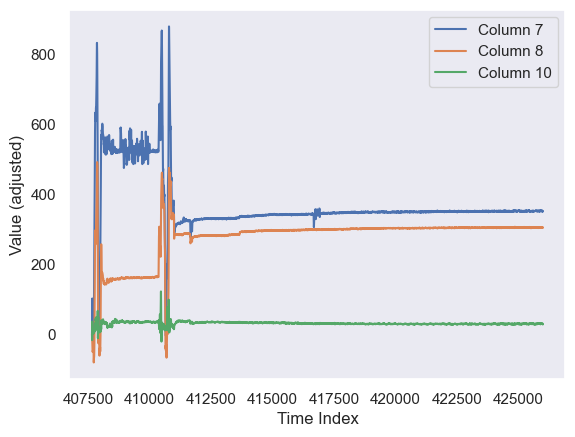

Plotting for interval: (491300, 491733)


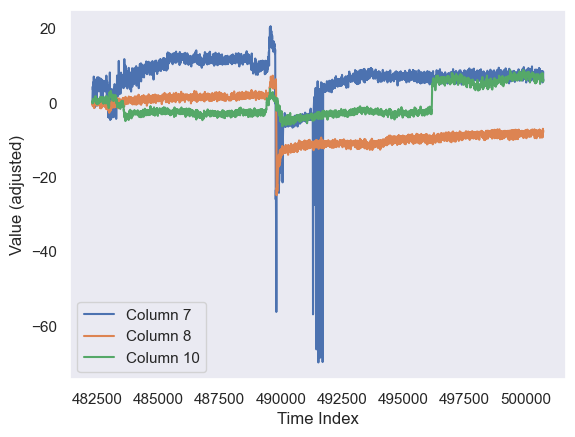

Plotting for interval: (604993, 605367)


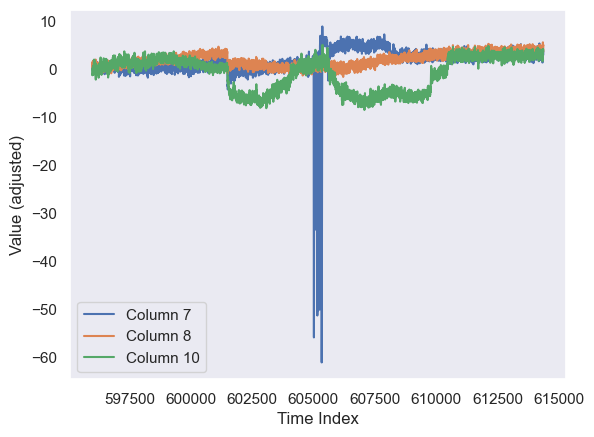

Plotting for interval: (656684, 656731)


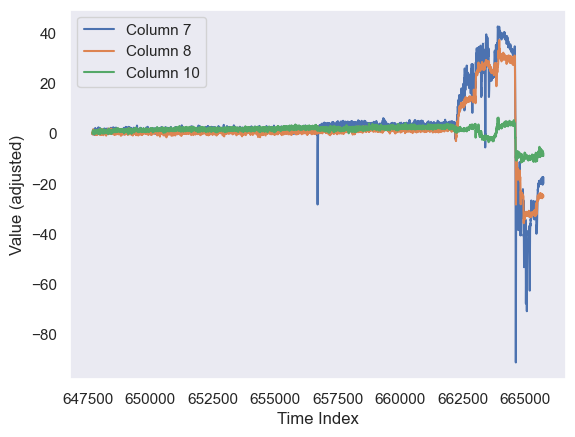

Plotting for interval: (735296, 735688)


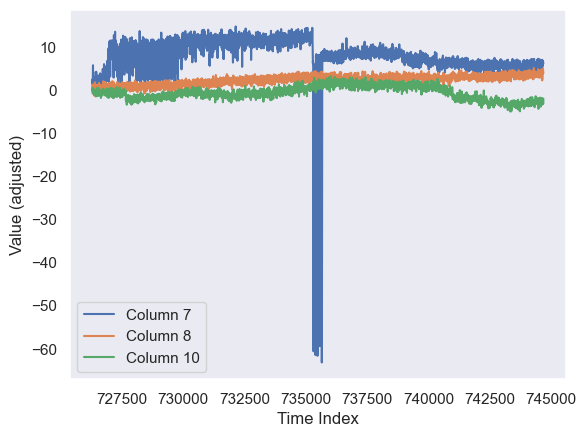

Plotting for interval: (828210, 828349)


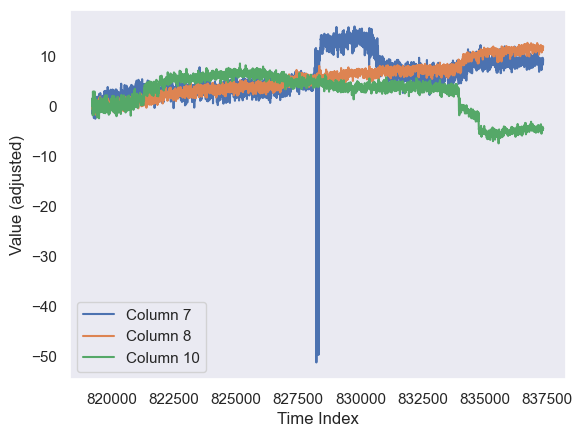

Plotting for interval: (863518, 863729)


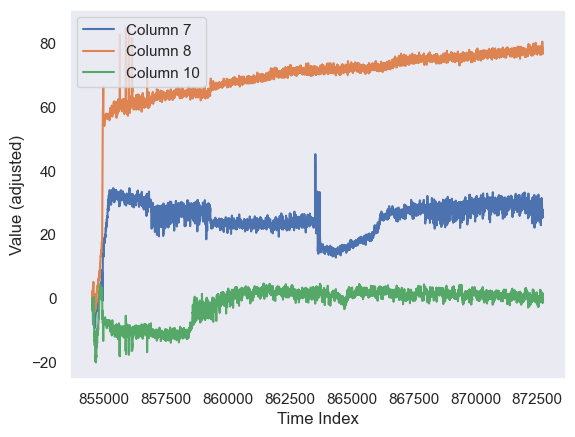

Plotting for interval: (998079, 998622)


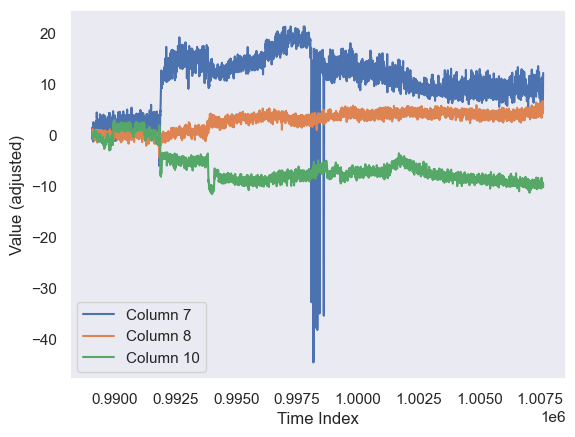

Plotting for interval: (1143240, 1143488)


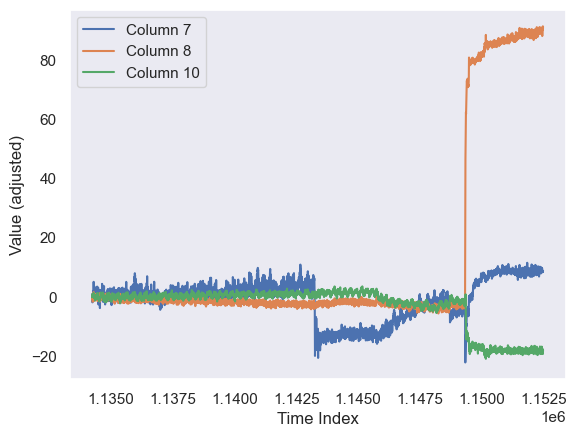

Plotting for interval: (1235882, 1236186)


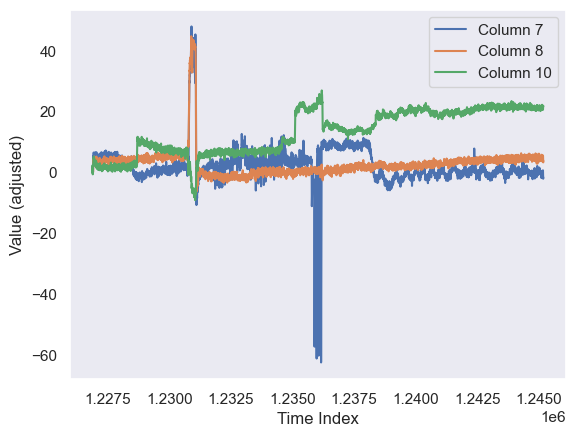

Plotting for interval: (1337562, 1337725)


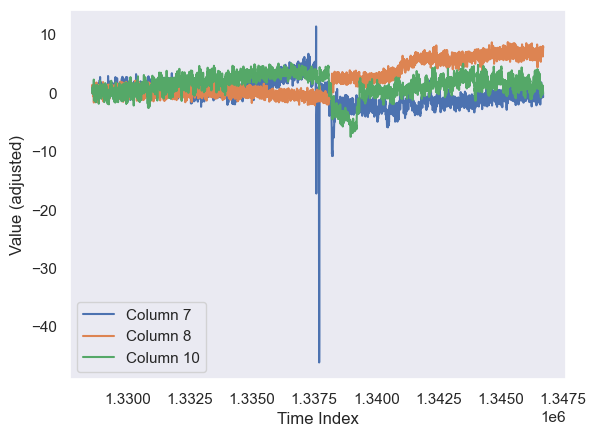

In [17]:
from input import Input

#Get Snap Features Associated with the desired experiment with start - stop time
expt_name = 'Fly08182021_F_B_6d_8am'
start = 18601
stop = 19963

snap_data, col_names = Input.load_snap_fts(io_process, expt_name)
import pandas as pd

data = """
416662	416993
491300	491733
604993	605367
656684	656731
735296	735688
828210	828349
863518	863729
998079	998622
1143240	1143488
1235882	1236186
1337562	1337725


"""

# Split data into lines and then split each line into start and stop values
start_vals = []
stop_vals = []

for line in data.strip().split("\n"):
    start, stop = line.split("\t")
    start_vals.append(int(start))
    stop_vals.append(int(stop))

# Create the dataframe
df = pd.DataFrame({
    'start_cols': start_vals,
    'stop_cols': stop_vals
})

# Sample rate and duration
SAMPLE_RATE = 30  # 30 Hz
DURATION = 5 * 60 * SAMPLE_RATE  # 5 minutes

# Dictionary to store slices
sliced_data_dict = {}

for index, row in df.iterrows():
    start_idx = row['start_cols'] - DURATION
    stop_idx = row['stop_cols'] + DURATION

    # Slice snap_data
    current_slice = snap_data.loc[start_idx:stop_idx]

    # Use the (start, stop) as a key for the dictionary
    key = (row['start_cols'], row['stop_cols'])
    sliced_data_dict[key] = current_slice




# Plotting data for each (start, stop) interval
for key, slice_data in sliced_data_dict.items():
    print(f"Plotting for interval: {key}")
    plot_columns(slice_data)
    
    

In [ ]:
key = (1235882, 1236186)